In [1]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('C://Users//Krishna//Sahana//Chess//', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=False)

# Download and load the test data
testset = datasets.FashionMNIST('C://Users//Krishna//Sahana//Chess//', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Display the training and test images

import matplotlib.pyplot as plt
import numpy as np
import torchvision

# function to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
    
# get training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

#get test images
datatstiter = iter(testloader)
tstimages, tstlabels = datatstiter.next()
# show images
imshow(torchvision.utils.make_grid(tstimages))

 99%|████████████████████████████████████████████████████████████████▌| 26238976/26421880 [00:17<00:00, 3359255.80it/s]

Extracting C://Users//Krishna//Sahana//Chess//FashionMNIST\raw\train-images-idx3-ubyte.gz to C://Users//Krishna//Sahana//Chess//FashionMNIST\raw



0it [00:00, ?it/s]
 56%|████████████████████████████████████████▌                                | 16384/29515 [00:00<00:00, 98514.21it/s]
32768it [00:00, 52478.11it/s]                                                                                          

Extracting C://Users//Krishna//Sahana//Chess//FashionMNIST\raw\train-labels-idx1-ubyte.gz to C://Users//Krishna//Sahana//Chess//FashionMNIST\raw



0it [00:00, ?it/s]
 98%|█████████████████████████████████████████████████████████████████▋ | 4333568/4422102 [00:04<00:00, 1339681.44it/s]

Extracting C://Users//Krishna//Sahana//Chess//FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C://Users//Krishna//Sahana//Chess//FashionMNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                         | 0/5148 [00:00<?, ?it/s]

8192it [00:00, 15028.68it/s]                                                                                           

Extracting C://Users//Krishna//Sahana//Chess//FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C://Users//Krishna//Sahana//Chess//FashionMNIST\raw
Processing...
Done!


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

26427392it [00:30, 3359255.80it/s]                                                                                     
4423680it [00:20, 1339681.44it/s]                                                                                      

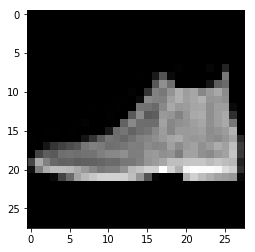

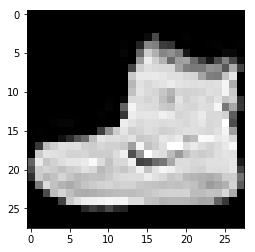

Test Images Size tensor(-1.) tensor(1.) torch.Size([64, 1, 28, 28])
Train Images Size tensor(-1.) tensor(1.) torch.Size([64, 1, 28, 28])


In [2]:
# Print shape size
imshow(torchvision.utils.make_grid(tstimages[0,:]))
imshow(torchvision.utils.make_grid(images[0,:]))
print("Test Images Size", tstimages.min(), tstimages.max(), tstimages.shape)
print("Train Images Size", images.min(), images.max(), images.shape)

In [3]:
import torch
from torch import nn
import torch.nn.functional as F
import math

# Loss Function
loss_func = F.cross_entropy

# Define the modle subclass
class Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1)
        self.conv2 = nn.Conv2d(16, 16, kernel_size=3, stride=2, padding=1)
        self.conv3 = nn.Conv2d(16, 10, kernel_size=3, stride=2, padding=1)

    def forward(self, xb):
        xb = xb.view(-1, 1, 28, 28)
        xb = F.relu(self.conv1(xb))
        xb = F.relu(self.conv2(xb))
        xb = F.relu(self.conv3(xb))
        xb = F.avg_pool2d(xb, 4)
        return xb.view(-1, xb.size(1))
 


In [5]:
import torch.optim as optim

lr = 0.1  # learning rate
epochs = 2  # how many epochs to train for

#Create the model and opt objects
def get_model():
    model = Net()
    return model, optim.SGD(model.parameters(), lr, momentum=0.9)

model, opt = get_model()

In [21]:
#Define a function for the loss calculation to be called by training and test data
def loss_batch(model, loss_func, xb, yb, opt=None):
    loss = loss_func(model(xb), yb)

    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad()

    return loss.item()

for epoch in range(epochs):
    valid_loss = 0
    valid_losses = 0
    model.train()
    for xb, yb in trainloader:
        val_loss = loss_batch(model, loss_func, xb, yb, opt)    
        valid_loss +=val_loss  
    print("Training loss:", "Epoch:", epoch, valid_loss / len(trainloader))
    
    model.eval()
    #Eval mode we dont pass opt
    with torch.no_grad():
        valid_losses = sum(loss_func(model(xb), yb) for xb, yb in testloader)
    print("Test loss:", "Epoch:", epoch, valid_losses/ len(testloader))


Training loss: Epoch: 0 0.31308130836531295
Test loss: Epoch: 0 tensor(0.4072)
Training loss: Epoch: 1 0.3092696369250319
Test loss: Epoch: 1 tensor(0.4144)
